In [1]:
#importing necessary packages

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [2]:
#loading data

data = pd.read_csv('NY property data.csv')

In [3]:
#first look at data

data.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [4]:
#removing unnecesary columns

columns_to_keep = ['RECORD','ZIP', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'LTFRONT', 'LTDEPTH', 'BLDFRONT', 'BLDDEPTH','TAXCLASS','B']
data = data[columns_to_keep]
data.head()

,RECORD,ZIP,STORIES,FULLVAL,AVLAND,AVTOT,LTFRONT,LTDEPTH,BLDFRONT,BLDDEPTH,TAXCLASS,B
0,1,10004.0,NaN,21400000.0,4225500.0,9630000.0,500,1046,0,0,4,1
1,2,10004.0,NaN,193800000.0,14310000.0,87210000.0,27,0,0,0,4,1
2,3,10004.0,3.0,104686000.0,39008700.0,47108700.0,709,564,709,564,4,1
3,4,10004.0,2.0,39200000.0,15255000.0,17640000.0,793,551,85,551,4,1
4,5,10004.0,1.0,272300000.0,121050000.0,122535000.0,323,1260,89,57,4,1


## Filling in missing values

**ZIP**

In [5]:
missing_zips = np.where(pd.isnull(data['ZIP']))[0]
len(missing_zips)

29890

In [6]:
for i in range(len(missing_zips)):
    if(data.loc[missing_zips[i]+1,'ZIP']==data.loc[missing_zips[i]-1,'ZIP']):
        data.loc[missing_zips[i],'ZIP']=data.loc[missing_zips[i]-1,'ZIP']

In [7]:
missing_zips = np.where(pd.isnull(data['ZIP']))[0]
len(missing_zips)

16437

In [8]:
for i in range(len(missing_zips)):
    data.loc[missing_zips[i],'ZIP'] = data.loc[missing_zips[i]-1,'ZIP']

In [9]:
missing_zips = np.where(pd.isnull(data['ZIP']))[0]
len(missing_zips)

0

**STORIES**

In [10]:
temp = data[data['STORIES'].isnull()]
len(temp)

56264

In [11]:
temp['TAXCLASS'].value_counts()

1B    24736
4     22354
3      4635
2      3435
1       897
2C      138
2B       34
2A       30
1A        5
Name: TAXCLASS, dtype: int64

In [12]:
mean_stories = data.groupby('TAXCLASS')['STORIES'].mean()
print(mean_stories)

TAXCLASS
1      2.111641
1A     1.656837
1B     4.000000
1C     3.052748
1D     1.068966
2     16.095110
2A     2.844574
2B     4.004494
2C     4.745097
3      1.333333
4      5.446968
Name: STORIES, dtype: float64


In [13]:
len(data[data['STORIES']==0])

0

In [14]:
data['STORIES']=data['STORIES'].fillna(value=0)
for index in mean_stories.index:
    data.loc[(data['STORIES']==0) & (data['TAXCLASS']==index),'STORIES']=mean_stories[index]

**FULLVAL, AVLAND, AVTOT**

In [15]:
data['FULLVAL'].replace('NaN',0)
temp = data[data['FULLVAL']!=0]
mean_fullval = temp.groupby('TAXCLASS')['FULLVAL'].mean()
print(mean_fullval)

TAXCLASS
1     5.698435e+05
1A    3.352842e+05
1B    5.613639e+05
1C    7.615359e+05
1D    2.233614e+07
2     7.998018e+05
2A    8.640037e+05
2B    1.252989e+06
2C    7.728799e+05
3     1.112765e+05
4     3.211928e+06
Name: FULLVAL, dtype: float64


In [16]:
data['AVLAND'].replace('NaN',0)
temp_avland = data[data['AVLAND']!=0]
mean_avland = temp_avland.groupby('TAXCLASS')['AVLAND'].mean()

In [17]:
data['AVTOT'].replace('NaN',0)
temp_avtot = data[data['AVTOT']!=0]
mean_avtot = temp_avland.groupby('TAXCLASS')['AVTOT'].mean()

In [18]:
%%time
for index in mean_fullval.index:
    data.loc[(data['FULLVAL']==0)&(data['TAXCLASS']==index),'FULLVAL']=mean_fullval[index]
    data.loc[(data['AVLAND']==0)&(data['TAXCLASS']==index),'AVLAND']=mean_avland[index]
    data.loc[(data['AVTOT']==0)&(data['TAXCLASS']==index),'AVTOT']=mean_avtot[index]

CPU times: user 1.99 s, sys: 42.9 ms, total: 2.03 s
Wall time: 1.97 s


**LTFRONT, LTDEPTH, BLDFRONT, BLDDEPTH**

In [19]:
data.loc[data['LTFRONT']==0,'LTFRONT']=np.nan
data.loc[data['LTDEPTH']==0,'LTDEPTH']=np.nan
data.loc[data['BLDFRONT']==0,'BLDFRONT']=np.nan
data.loc[data['BLDDEPTH']==0,'BLDDEPTH']=np.nan

data.loc[data['LTFRONT']==1,'LTFRONT']=np.nan
data.loc[data['LTDEPTH']==1,'LTDEPTH']=np.nan
data.loc[data['BLDFRONT']==1,'BLDFRONT']=np.nan
data.loc[data['BLDDEPTH']==1,'BLDDEPTH']=np.nan

In [20]:
mean_LTFRONT = data.groupby(data['TAXCLASS'])['LTFRONT'].mean()
mean_LTDEPTH = data.groupby(data['TAXCLASS'])['LTDEPTH'].mean()
mean_BLDFRONT = data.groupby(data['TAXCLASS'])['BLDFRONT'].mean()
mean_BLDDEPTH = data.groupby(data['TAXCLASS'])['BLDDEPTH'].mean()

In [21]:
for index in mean_LTFRONT.index:
    data.loc[(data['LTFRONT'].isnull())&(data['TAXCLASS']==index),'LTFRONT']=mean_LTFRONT[index]
    data.loc[(data['LTDEPTH'].isnull())&(data['TAXCLASS']==index),'LTDEPTH']=mean_LTDEPTH[index]
    data.loc[(data['BLDFRONT'].isnull())&(data['TAXCLASS']==index),'BLDFRONT']=mean_BLDFRONT[index]
    data.loc[(data['BLDDEPTH'].isnull())&(data['TAXCLASS']==index),'BLDDEPTH']=mean_BLDDEPTH[index]

## Feature Engineering

In [22]:
data['ZIP'] = data['ZIP'].astype(str)
data['zip3'] = data['ZIP'].str[:3]

In [23]:
data['ltsize'] = data['LTFRONT'] * data['LTDEPTH']
data['bldsize'] = data['BLDFRONT'] * data['BLDDEPTH']
data['bldvol'] = data['bldsize'] * data['STORIES']

In [24]:
data['r1'] = data['FULLVAL'] / data['ltsize']
data['r2'] = data['FULLVAL'] / data['bldsize']
data['r3'] = data['FULLVAL'] / data['bldvol']
data['r4'] = data['AVLAND'] / data['ltsize']
data['r5'] = data['AVLAND'] / data['bldsize']
data['r6'] = data['AVLAND'] / data['bldvol']
data['r7'] = data['AVTOT'] / data['ltsize']
data['r8'] = data['AVTOT'] / data['bldsize']
data['r9'] = data['AVTOT'] / data['bldvol']

In [25]:
ninevars = ['r1','r2','r3','r4','r5','r6','r7','r8','r9']
zip5_mean = data.groupby('ZIP')[ninevars].mean()
zip3_mean = data.groupby('zip3')[ninevars].mean()
taxclass_mean = data.groupby('TAXCLASS')[ninevars].mean()
borough_mean = data.groupby('B')[ninevars].mean()

data = data.join(zip5_mean, on='ZIP',rsuffix='_zip5')
data = data.join(zip3_mean, on='zip3',rsuffix='_zip3')
data = data.join(taxclass_mean, on='TAXCLASS',rsuffix='_taxclass')
data = data.join(borough_mean, on='B',rsuffix='_boro')
rsuffix = ['_zip5','_zip3','_taxclass','_boro']

for var in ninevars:
    for r in rsuffix:
        data[str(var)+r] = data[var] / data[str(var)+r]

## Creating variable stats submission

In [26]:
data.drop(columns = ['STORIES','FULLVAL','AVLAND','AVTOT','LTFRONT',
                    'LTDEPTH','BLDFRONT','BLDDEPTH','B','ZIP','TAXCLASS',
                    'zip3','ltsize', 'bldsize', 'bldvol'],inplace=True)

In [27]:
data.head()

,RECORD,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,r2_zip5,r3_zip5,r4_zip5,r5_zip5,r6_zip5,r7_zip5,r8_zip5,r9_zip5,r1_zip3,r2_zip3,r3_zip3,r4_zip3,r5_zip3,r6_zip3,r7_zip3,r8_zip3,r9_zip3,r1_taxclass,r2_taxclass,r3_taxclass,r4_taxclass,r5_taxclass,r6_taxclass,r7_taxclass,r8_taxclass,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
0,1,40.917782,3781.487225,694.237107,8.079350,746.667022,137.079388,18.413002,1701.669251,312.406698,0.100365,6.121586,4.513332,0.144135,5.877911,2.472274,0.107948,6.432645,4.720281,0.112154,6.737654,4.929328,0.229629,11.453513,5.959567,0.193457,11.517296,8.943176,0.155286,7.168449,2.860339,0.168340,5.421032,1.785349,0.154258,6.944087,2.794864,0.115040,6.906445,5.079761,0.238229,11.898251,6.281489,0.199588,11.907975,9.364705
1,2,53616.895011,34245.431036,6287.063144,3959.018409,2528.648700,464.230514,24127.602755,15410.443966,2829.178415,131.514300,55.437539,40.873075,70.628446,19.906023,8.372556,141.450792,58.254518,42.747220,146.962113,61.016697,44.640367,112.521958,38.788256,20.182558,253.497474,104.301493,80.990068,203.480201,64.918013,25.903440,82.489474,18.358767,6.046230,202.132917,62.886173,25.310494,150.743329,62.545284,46.002691,116.736206,40.294395,21.272775,261.531340,107.839512,84.807467
2,3,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424,0.642147,0.423804,0.567324,1.740317,0.767949,0.586461,0.690664,0.445338,0.593338,0.717574,0.466455,0.619615,2.772592,1.496401,1.413701,1.237757,0.797354,1.124154,0.993536,0.496279,0.359544,2.032578,0.708257,0.423512,0.986958,0.480746,0.351313,0.736037,0.478140,0.638524,2.876433,1.554506,1.490065,1.276984,0.824401,1.177140
3,4,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700,0.220056,1.354930,2.720665,0.622844,2.564116,2.937217,0.236682,1.423779,2.845415,0.245904,1.491288,2.971430,0.992287,4.996357,7.080342,0.424163,2.549197,5.391002,0.340472,1.586639,1.724230,0.727442,2.364812,2.121107,0.338218,1.536979,1.684761,0.252231,1.528648,3.062111,1.029451,5.190364,7.462806,0.437606,2.635669,5.645102
4,5,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541,1.641141,86.892859,348.957284,5.306203,187.843400,430.352475,1.765137,91.308194,364.957954,1.833911,95.637637,381.120858,8.453596,366.025788,1037.390976,3.163345,163.482272,691.459456,2.539189,101.752564,221.152780,6.197303,173.242696,310.778437,2.522377,98.567855,216.090453,1.881096,98.033545,392.751808,8.770206,380.238484,1093.428521,3.263598,169.027768,724.050819


In [28]:
#stats = data.describe().transpose()
#stats.to_csv('stats_on_vars.csv')

## Beginning of Homework 3

In [29]:
#pip install keras
#pip install tensorflow

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from keras.models import Model
from keras.layers import Input, Dense

In [31]:
raw_data = pd.read_csv('NY property data.csv')

In [32]:
data.head()

,RECORD,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,r2_zip5,r3_zip5,r4_zip5,r5_zip5,r6_zip5,r7_zip5,r8_zip5,r9_zip5,r1_zip3,r2_zip3,r3_zip3,r4_zip3,r5_zip3,r6_zip3,r7_zip3,r8_zip3,r9_zip3,r1_taxclass,r2_taxclass,r3_taxclass,r4_taxclass,r5_taxclass,r6_taxclass,r7_taxclass,r8_taxclass,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
0,1,40.917782,3781.487225,694.237107,8.079350,746.667022,137.079388,18.413002,1701.669251,312.406698,0.100365,6.121586,4.513332,0.144135,5.877911,2.472274,0.107948,6.432645,4.720281,0.112154,6.737654,4.929328,0.229629,11.453513,5.959567,0.193457,11.517296,8.943176,0.155286,7.168449,2.860339,0.168340,5.421032,1.785349,0.154258,6.944087,2.794864,0.115040,6.906445,5.079761,0.238229,11.898251,6.281489,0.199588,11.907975,9.364705
1,2,53616.895011,34245.431036,6287.063144,3959.018409,2528.648700,464.230514,24127.602755,15410.443966,2829.178415,131.514300,55.437539,40.873075,70.628446,19.906023,8.372556,141.450792,58.254518,42.747220,146.962113,61.016697,44.640367,112.521958,38.788256,20.182558,253.497474,104.301493,80.990068,203.480201,64.918013,25.903440,82.489474,18.358767,6.046230,202.132917,62.886173,25.310494,150.743329,62.545284,46.002691,116.736206,40.294395,21.272775,261.531340,107.839512,84.807467
2,3,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424,0.642147,0.423804,0.567324,1.740317,0.767949,0.586461,0.690664,0.445338,0.593338,0.717574,0.466455,0.619615,2.772592,1.496401,1.413701,1.237757,0.797354,1.124154,0.993536,0.496279,0.359544,2.032578,0.708257,0.423512,0.986958,0.480746,0.351313,0.736037,0.478140,0.638524,2.876433,1.554506,1.490065,1.276984,0.824401,1.177140
3,4,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700,0.220056,1.354930,2.720665,0.622844,2.564116,2.937217,0.236682,1.423779,2.845415,0.245904,1.491288,2.971430,0.992287,4.996357,7.080342,0.424163,2.549197,5.391002,0.340472,1.586639,1.724230,0.727442,2.364812,2.121107,0.338218,1.536979,1.684761,0.252231,1.528648,3.062111,1.029451,5.190364,7.462806,0.437606,2.635669,5.645102
4,5,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541,1.641141,86.892859,348.957284,5.306203,187.843400,430.352475,1.765137,91.308194,364.957954,1.833911,95.637637,381.120858,8.453596,366.025788,1037.390976,3.163345,163.482272,691.459456,2.539189,101.752564,221.152780,6.197303,173.242696,310.778437,2.522377,98.567855,216.090453,1.881096,98.033545,392.751808,8.770206,380.238484,1093.428521,3.263598,169.027768,724.050819


**Z-scale variables before PCA**

In [33]:
data_variables = data.copy()
data.drop(columns='RECORD',inplace=True)
data = (data - data.mean()) / data.std()

In [34]:
data.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,r2_zip5,r3_zip5,r4_zip5,r5_zip5,r6_zip5,r7_zip5,r8_zip5,r9_zip5,r1_zip3,r2_zip3,r3_zip3,r4_zip3,r5_zip3,r6_zip3,r7_zip3,r8_zip3,r9_zip3,r1_taxclass,r2_taxclass,r3_taxclass,r4_taxclass,r5_taxclass,r6_taxclass,r7_taxclass,r8_taxclass,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
0,-0.255761,1.391255,0.298531,-0.016532,0.733160,0.191155,-0.032729,1.279582,0.410407,-0.316187,1.207352,0.551517,-0.078654,0.294364,0.077036,-0.099985,0.430878,0.257393,-0.291406,1.327458,0.417404,-0.035848,0.341149,0.141440,-0.069709,0.431041,0.311610,-0.238868,1.127017,0.279629,-0.163144,0.505321,0.082004,-0.226342,0.865514,0.239674,-0.291407,1.378940,0.423640,-0.035493,0.353823,0.146368,-0.069324,0.464675,0.328655
1,80.032072,14.476590,4.049227,22.085202,2.552784,0.699158,89.652153,11.941798,3.980206,45.870785,12.832994,6.259209,6.398880,1.140910,0.385766,15.742376,4.541008,2.888337,47.907292,13.885401,4.635818,5.189544,1.233215,0.547058,21.823080,4.233707,3.138000,57.257296,11.678248,3.743256,15.985502,1.984094,0.526911,53.828364,9.011194,3.246255,49.308730,14.368584,4.673052,5.392397,1.275732,0.561827,22.564715,4.551319,3.292858
2,0.075242,-0.120576,-0.108520,0.483982,0.070334,0.028791,0.337016,0.047709,0.022988,-0.125772,-0.135831,-0.067921,0.068035,-0.014003,-0.021638,-0.034672,-0.043992,-0.028135,-0.092697,-0.123441,-0.040407,0.082485,0.016200,0.011798,0.020549,-0.008305,0.004871,-0.001828,-0.092033,-0.096268,0.202557,-0.033346,-0.060195,-0.003490,-0.075608,-0.086621,-0.086920,-0.121835,-0.037535,0.087427,0.018003,0.013581,0.023990,-0.007480,0.006960
3,-0.182636,0.126486,0.113608,0.133577,0.303320,0.231186,0.048955,0.249021,0.234403,-0.274121,0.083670,0.270107,-0.034661,0.094389,0.101364,-0.085556,0.033611,0.127677,-0.247507,0.113664,0.209421,-0.000359,0.130421,0.173402,-0.049769,0.063492,0.172258,-0.186501,0.107183,0.108860,-0.053467,0.155997,0.117062,-0.177110,0.078189,0.091438,-0.246232,0.123420,0.214128,0.001372,0.136044,0.179106,-0.048709,0.069679,0.182510
4,0.685581,22.822842,35.829707,1.602135,24.336380,37.030788,1.018790,18.742506,34.227910,0.225337,20.248207,54.621755,0.395742,11.275326,22.465712,0.085760,7.162583,25.180912,0.273704,21.895266,40.379380,0.346844,11.912566,29.556353,0.186976,6.659171,27.086638,0.435252,18.408166,33.091340,1.019537,19.687208,32.346061,0.407427,14.206773,28.721693,0.290135,22.653802,40.679265,0.362030,12.312361,30.274899,0.196051,7.157913,28.409205


**PCA**

(0.0, 1.0)

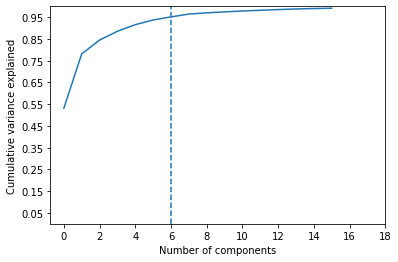

In [35]:
pca = PCA(n_components = .99,svd_solver='full')
pca.fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance explained')
plt.yticks(np.arange(0.05,1.1,step=.1))
plt.xticks(np.arange(0,20,step=2))
plt.axvline(x=6,linestyle='--')
plt.ylim(0,1)

In [36]:
pca = PCA(n_components=5)
princ_comps = pca.fit_transform(data)
data_pca = pd.DataFrame(princ_comps, columns = ['PC'+str(i) for i in range(1,pca.n_components_+1)])

**Z-Scale PC's**

In [37]:
pca_mean = data_pca.mean()
pca_sd = data_pca.std()
data_pca = (data_pca - pca_mean) / pca_sd
data_pca.describe()

,PC1,PC2,PC3,PC4,PC5
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,-2.424526e-16,-9.743212e-16,3.564299e-16,-1.570459e-15,-5.196849e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.473123e-01,-3.121770e+02,-4.693497e+02,-1.839580e+02,-3.911585e+02
25%,-6.862403e-02,-9.947863e-02,-6.131604e-02,-1.448078e-01,-1.114986e-01
50%,-1.944495e-02,-4.105366e-02,1.099318e-02,-2.396819e-02,-5.630894e-02
75%,1.192503e-02,2.033199e-02,1.500593e-01,5.505635e-02,3.222922e-02
max,5.229280e+02,6.036698e+02,6.141779e+02,3.898520e+02,4.478940e+02


In [38]:
#mean is 0, sd is 1
#data is ready for algorithms

**Model 1 (z-score outliers)**

In [39]:
p=3
one_over_p = 1/p
score1 = (((data_pca).abs()**p).sum(axis=1))**one_over_p

**Model 2 (autoencoder error)**

In [40]:
#placeholder for input
data_in = Input(shape=(5,))

#dimensions for encoded data
encoded_dim = 2

In [41]:
#encoded representation of the data
encoded = Dense(encoded_dim,activation='tanh')(data_in)

In [42]:
#reconstruction of the input
decoded = Dense(5,activation='tanh')(encoded)

In [43]:
#maps input data to reconstructed data
autoencoder = Model(data_in,decoded)

In [44]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [45]:
autoencoder.fit(data_pca,data_pca,epochs=5,shuffle=True,validation_data=(data_pca,data_pca))

Epoch 1/5
33469/33469 [==============================] - 41s 1ms/step - loss: 0.6725 - val_loss: 0.9349
Epoch 2/5
33469/33469 [==============================] - 38s 1ms/step - loss: 0.9408 - val_loss: 0.9341
Epoch 3/5
33469/33469 [==============================] - 37s 1ms/step - loss: 1.0450 - val_loss: 0.9332
Epoch 4/5
33469/33469 [==============================] - 38s 1ms/step - loss: 1.3282 - val_loss: 0.9338
Epoch 5/5
33469/33469 [==============================] - 38s 1ms/step - loss: 1.2167 - val_loss: 0.9333


In [46]:
pca_out = autoencoder.predict(data_pca)
error = pca_out - data_pca

p=1
one_over_p = 1/p
score2 = ((error.abs()**p).sum(axis=1))**one_over_p

**Final Score (average ranking of scores 1 and 2)**

In [47]:
scores = pd.DataFrame(score1)
scores.columns = ['score1']
scores['score2'] = score2
scores['score1 rank'] = scores['score1'].rank()
scores['score2 rank'] = scores['score2'].rank()
scores['final'] = (scores['score1 rank'] + scores['score2 rank'])/2

(0.1, 2142226.194993785)

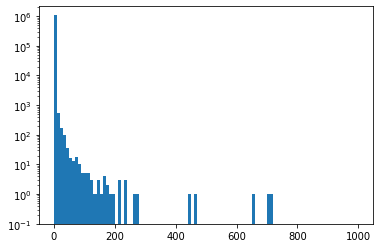

In [48]:
#score 1 distribution

plt.hist(score1,bins=100,range=(0,1000))
plt.yscale('log')
plt.ylim(ymin=.1)

(0.1, 2139554.470171374)

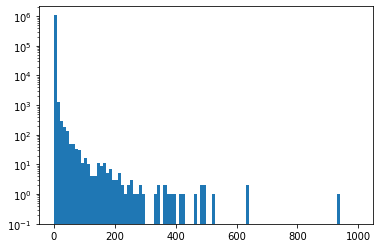

In [49]:
#score 2 distribution

plt.hist(score2,bins=100,range=(0,1000))
plt.yscale('log')
plt.ylim(ymin=.1)

/Users/alekcarlson/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='final', ylabel='Density'>

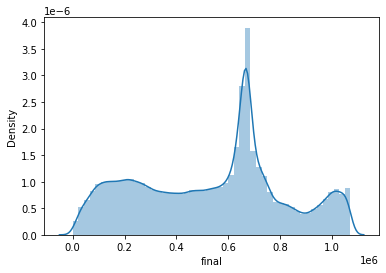

In [50]:
#final score distribution

sns.distplot(scores['final'])

In [51]:
scores.head()

,score1,score2,score1 rank,score2 rank,final
0,1.380193,2.373724,1051097.0,1059132.0,1055114.5
1,56.228895,143.474854,1070900.0,1070907.0,1070903.5
2,0.154342,0.252132,484366.0,915644.0,700005.0
3,0.277194,0.494838,753057.0,1012162.0,882609.5
4,34.470397,81.783530,1070809.0,1070833.0,1070821.0


**Creating top100 submission**

In [52]:
raw_data.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [53]:
data_with_scores = raw_data.copy()

In [54]:
data_with_scores['score1_rank'] = scores['score1 rank']
data_with_scores['score2_rank'] = scores['score2 rank']
data_with_scores['final_score'] = scores['final']

In [55]:
data_with_scores.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,score1_rank,score2_rank,final_score
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,1051097.0,1059132.0,1055114.5
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,1070900.0,1070907.0,1070903.5
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,484366.0,915644.0,700005.0
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,753057.0,1012162.0,882609.5
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,1070809.0,1070833.0,1070821.0


In [56]:
top100 = data_with_scores.sort_values(['final_score'], ascending = False).head(100)

In [57]:
top100

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,score1_rank,score2_rank,final_score
565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117,108,NaN,NaN,4.326304e+09,1.946837e+09,1.946837e+09,1.946837e+09,1.946837e+09,2231.0,FLATBUSH AVENUE,NaN,X1,0,0,8.484847e+08,8.484847e+08,8.484847e+08,8.484847e+08,NaN,FINAL,2010/11,AC-TR,1070994.0,1070994.0,1070994.0
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910,0,NaN,3.0,3.740199e+08,1.792809e+09,4.668309e+09,1.792809e+09,4.668309e+09,2198.0,154-68 BROOKVILLE BOULEVARD,11422.0,X4,0,0,1.644454e+09,4.501180e+09,1.644454e+09,4.501180e+09,NaN,FINAL,2010/11,AC-TR,1070993.0,1070992.0,1070992.5
85885,85886,1012540010,1,1254,10,NaN,PARKS AND RECREATION,Q1,4,4000,150,NaN,1.0,7.021400e+07,3.145500e+07,3.159630e+07,3.145500e+07,3.159630e+07,2231.0,JOE DIMAGGIO HIGHWAY,NaN,X1,8,8,2.813400e+07,2.826018e+07,2.813400e+07,2.826018e+07,NaN,FINAL,2010/11,AC-TR,1070992.0,1070993.0,1070992.5
684703,684704,4036590105,4,3659,105,NaN,W RUFERT,V0,1B,2,2,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,69 STREET,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1070991.0,1070991.0,1070991.0
67128,67129,1011110001,1,1111,1,NaN,CULTURAL AFFAIRS,Q1,4,840,0,E,NaN,6.150000e+09,2.668500e+09,2.767500e+09,2.668500e+09,2.767500e+09,2231.0,1000 5 AVENUE,10028.0,X1,0,0,2.371005e+09,2.465055e+09,2.371005e+09,2.465055e+09,NaN,FINAL,2010/11,AC-TR,1070990.0,1070990.0,1070990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259234,259235,3002580001,3,258,1,NaN,PARKS AND RECREATION,Q2,4,316,555,NaN,1.0,2.764000e+06,1.188000e+06,1.243800e+06,1.188000e+06,1.243800e+06,2231.0,46 COLUMBIA PLACE,11201.0,X1,5,10,1.061100e+06,1.111122e+06,1.061100e+06,1.111122e+06,NaN,FINAL,2010/11,AC-TR,1070896.0,1070901.0,1070898.5
451671,451672,3058320002,3,5832,2,NaN,PARKS AND RECREATION,Q1,4,1044,1325,NaN,1.0,3.019000e+07,1.309500e+07,1.358550e+07,1.309500e+07,1.358550e+07,2231.0,COLONIAL ROAD,NaN,X1,18,38,1.170000e+07,1.213929e+07,1.170000e+07,1.213929e+07,NaN,FINAL,2010/11,AC-TR,1070894.0,1070902.0,1070898.0
420499,420500,3051370109,3,5137,109,NaN,HENRI JACQUES,V0,1B,2,16,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,ROGERS AVENUE,11226.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,1070901.0,1070893.0,1070897.0
252614,252615,2059000001,2,5900,1,NaN,PARKS AND RECREATION,Q1,4,183,396,NaN,1.0,9.630000e+07,4.306500e+07,4.333500e+07,4.306500e+07,4.333500e+07,2231.0,3545 JEROME AVENUE,10467.0,X1,54,22,4.150800e+07,4.177800e+07,4.150800e+07,4.177800e+07,NaN,FINAL,2010/11,AC-TR,1070899.0,1070892.0,1070895.5


In [58]:
#top100.to_csv('newtop100_alekcarlson.csv',index=False)

**Changes Made**

In [59]:
#only kept 5 PC's  
#reasoning: we are already well over 80% explained variance, even with only 2 PC's

#changed power p in score 1 to 3 instead of 2 
#reasoning: this will make the distance measure focus more on the largest dimension value

#changed power p in score 2 to 1 instead of 2,
#reasoning: this will make the distance measure consider all dimensions equally, 
#           I like this since we are not extensively training the autoencoder

**Creating Heat Map**

In [60]:
vizdata = data.copy()
vizdata['final_score'] = scores['final']
vizdata.insert(0,'RECORD',raw_data.RECORD)
top100viz = vizdata.sort_values(['final_score'],ascending=False).head(100)

In [61]:
top100viz.set_index('RECORD',inplace=True)

In [62]:
top10viz = top100viz.head(10)
top10viz.drop(columns='final_score',inplace=True)

/Users/alekcarlson/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


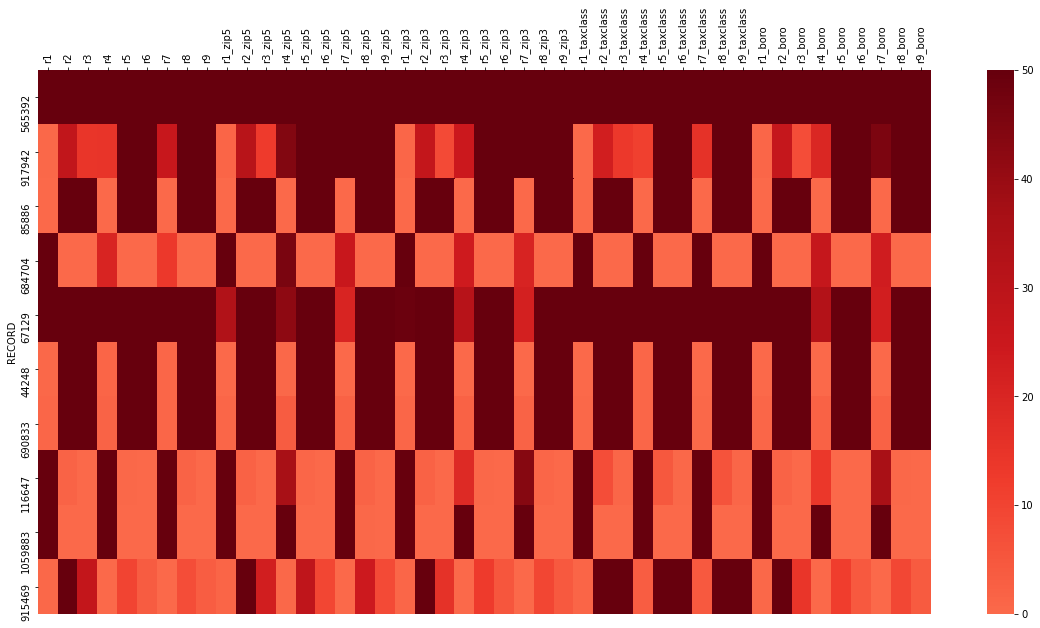

In [66]:
top10viz_abs = top10viz.abs()
data_heatmap = top10viz.abs().head(10)
plt.rcParams['figure.figsize'] = (20,10)
ax = sns.heatmap(data_heatmap, center=0, vmin=0, vmax=50, cmap='Reds')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
plt.savefig('heatmap.png')

In [64]:
top10viz

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_zip5,r2_zip5,r3_zip5,r4_zip5,r5_zip5,r6_zip5,r7_zip5,r8_zip5,r9_zip5,r1_zip3,r2_zip3,r3_zip3,r4_zip3,r5_zip3,r6_zip3,r7_zip3,r8_zip3,r9_zip3,r1_taxclass,r2_taxclass,r3_taxclass,r4_taxclass,r5_taxclass,r6_taxclass,r7_taxclass,r8_taxclass,r9_taxclass,r1_boro,r2_boro,r3_boro,r4_boro,r5_boro,r6_boro,r7_boro,r8_boro,r9_boro
RECORD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
565392,512.765210,328.137810,93.955048,861.816504,351.253292,98.049397,573.033241,267.519796,89.549858,508.653468,251.721405,64.402916,727.995459,328.625863,175.466821,641.569614,338.574417,162.536404,460.338575,302.100136,55.959847,937.628638,555.917918,180.650105,724.493689,341.100037,134.124509,367.148524,264.595884,86.767915,629.535714,285.366370,85.786003,345.170919,204.266719,75.315340,461.863588,304.868676,54.703561,938.887683,553.119217,175.573719,726.151071,354.612473,134.353739
917942,0.535636,28.155462,14.607118,15.196011,323.460897,163.953849,26.318384,641.545643,389.987533,1.492310,31.186815,12.699132,44.144761,289.767564,213.137580,88.893847,431.769336,333.009777,1.024486,27.583387,8.410477,24.827714,411.564576,233.842249,63.644988,784.982818,504.023214,0.327872,22.708071,13.493073,10.951910,262.780019,143.504954,15.655952,490.013591,328.352110,0.783165,26.629905,7.710688,19.701153,379.852884,194.948448,45.398378,752.629342,444.211547
85886,-0.141711,471.007306,735.572763,0.231539,501.836908,763.158673,0.094670,383.932975,700.222268,-0.165887,544.809022,697.801722,0.113772,285.587099,303.771786,-0.008354,269.176365,373.471759,-0.222939,452.016094,827.381618,0.022802,246.005971,609.339238,-0.038610,136.903896,554.388074,-0.157194,379.797294,679.277846,0.018110,407.742813,668.287015,-0.149557,293.203625,589.640230,-0.220949,467.560770,833.464564,0.025431,254.237338,624.123556,-0.037172,147.129116,581.421286
684704,209.994955,-0.159183,-0.138220,20.610045,-0.024656,-0.019945,13.647789,-0.040397,-0.031106,224.806257,-0.158736,-0.130036,45.910629,-0.053166,-0.048979,25.826514,-0.072954,-0.066196,240.711366,-0.165930,-0.091679,24.135909,-0.027314,-0.026524,20.731600,-0.037121,-0.037511,458.243521,-0.000009,-0.000008,394.102155,-0.000001,-0.000002,537.531813,-0.000002,-0.000002,274.043849,-0.163587,-0.088594,26.708414,-0.027038,-0.025624,23.584207,-0.038468,-0.037462
67129,81.640121,466.558209,133.630975,132.685538,481.468505,134.402892,91.448411,380.307753,127.312210,33.568954,232.877864,133.721190,42.029163,143.941543,119.109470,20.673876,127.588517,113.154316,48.872642,447.746314,150.376636,31.338177,236.020414,107.303924,22.261561,135.610965,100.786189,58.408861,376.209809,123.407147,96.795708,391.189798,117.624301,54.911001,290.434042,107.119819,50.302149,463.144208,151.484805,32.554357,243.917715,109.908658,23.018042,145.739631,105.702266
44248,0.549015,192.655103,300.986032,1.323284,196.409332,298.699543,0.866240,157.125534,286.595712,0.231394,174.881096,282.038179,0.436948,92.576125,121.807711,0.119875,69.441474,137.321036,0.191720,184.882604,338.601162,0.280917,96.270888,238.487960,0.149737,56.013305,226.898998,0.337453,155.350737,277.953276,0.815794,159.527626,261.514890,0.315482,119.928123,241.272710,0.205767,191.244109,341.092445,0.293548,99.492882,244.275273,0.157551,60.197739,237.964198
690833,0.796250,259.635741,135.075906,1.715713,264.186396,133.907901,1.142412,211.702818,128.687452,0.840457,270.745898,126.262543,3.863580,410.363656,254.914237,2.234133,382.304700,239.661244,0.947775,230.024320,68.160596,2.032769,304.129878,152.000689,1.796619,232.223211,137.761740,0.514504,209.359915,124.741488,1.102522,214.608758,117.190789,0.481936,161.623872,108.278085,1.123162,245.674325,71.430493,2.253910,310.244852,159.222125,2.054481,248.365162,146.578844
116647,128.360902,1.933488,-0.070398,57.266052,0.585411,0.005005,143.637486,1.721406,0.059271,84.637968,2.048496,0.026092,36.406584,0.901754,0.043027,56.727301,1.739706,0.171619,79.006560,2.009981,0.017685,18.406374,0.487115,0.023452,43.688133,0.898103,0.097317,297.8

In [65]:
#565392:  r1, r2, r3, r4, r5, r6, r7, r8, r9
#85886:   r2, r3, r5, r6, r8, r9
#917942:  r5, r6, r7, r8, r9
#684704:  r1, r4, r7
#67129:   r1, r2, r3, r4, r5, r6, r7, r8, r9
#690833:  r2, r3, r5, r6, r8, r9
#44248:   r2, r3, r5, r6, r8, r9
#116647:  r1, r4, r7
#1059883: r1, r4, r7
#915469:  r2, r3